# IPP video coding

In [1]:
sequence = "bus"

In [2]:
!../sequences/$sequence/runme.sh

bus_cif.y4m exists.
ffmpeg version n4.3.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 10.2.0 (GCC)
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-amf --enable-avisynth --enable-cuda-llvm --enable-lto --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libdrm --enable-libfreetype --enable-libfribidi --enable-libgsm --enable-libiec61883 --enable-libjack --enable-libmfx --enable-libmodplug --enable-libmp3lame --enable-libopencore_amrnb --enable-libopencore_amrwb --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librav1e --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libv4l2 --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxcb --enable-libxml2 --enable-libxvid --enable-libzimg 

In [20]:
!sed -z -i 's/\n#import image_IPP as codec\n/\nimport image_IPP as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport image_IPP_adaptive as codec\n/\n#import image_IPP_adaptive as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport MP4 as codec\n/\n#import MP4 as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport IPP_compressor as codec\n/\n#import IPP_compressor as codec\n/g' RD_curve.py

In [21]:
!cat -n RD_curve.py | grep "import" 

     5	import config
     6	import distortion
     7	import frame
    10	#import image_interpolated_IPP as codec
    11	import image_IPP as codec
    12	#import image_IPP_adaptive as codec
    13	#import MP4 as codec
    14	#import IPP_compressor as codec


In [22]:
!sed -z -i 's/\ntransform = "DWT"\n/\n#transform = "DWT"\n/g' config.py
!sed -z -i 's/\ntransform = "LP"\n/\n#transform = "LP"\n/g' config.py
!sed -z -i 's/\n#transform = None\n/\ntransform = None\n/g' config.py

In [23]:
!cat -n config.py | grep "transform" 

     3	#transform = "DWT"
     4	#transform = "LP"
     5	transform = None


In [24]:
!python RD_curve.py 1> >(tee /tmp/output >&1) | grep BPP | grep Average | cat -n

     1	Q_step: 21 BPP: 0.2963681958473625 KBPS: 2704.016 Average AMSE: 88.66902510346522
     2	Q_step: 24 BPP: 0.21520675505050504 KBPS: 1963.512 Average AMSE: 144.2772261460087
     3	Q_step: 27 BPP: 0.15241126543209876 KBPS: 1390.576 Average AMSE: 239.33226338909935
     4	Q_step: 30 BPP: 0.10863145342312008 KBPS: 991.136 Average AMSE: 357.34598502384966
     5	Q_step: 33 BPP: 0.07962436868686869 KBPS: 726.48 Average AMSE: 505.286693102904
     6	Q_step: 36 BPP: 0.06230885241301908 KBPS: 568.496 Average AMSE: 669.8268617161194
     7	Q_step: 39 BPP: 0.052790930134680135 KBPS: 481.656 Average AMSE: 849.423607165404


In [25]:
!grep BPP /tmp/output | grep Average | cut -d ' ' -f 4,9 | tr ' ' '\t'  > /tmp/image_IPP.txt

In [27]:
!cat /tmp/image_IPP.txt

0.2963681958473625	88.66902510346522
0.21520675505050504	144.2772261460087
0.15241126543209876	239.33226338909935
0.10863145342312008	357.34598502384966
0.07962436868686869	505.286693102904
0.06230885241301908	669.8268617161194
0.052790930134680135	849.423607165404


In [28]:
RD_image_IPP = []
with open("/tmp/image_IPP.txt", 'r') as f:
    for line in f:
        rate, _distortion = line.split('\t')
        RD_image_IPP.append((float(rate), float(_distortion)))

## MP4

In [12]:
!sed -z -i 's/\nimport image_IPP as codec/\n#import image_IPP as codec/g' RD_curve.py
!sed -z -i 's/\nimport image_IPP_adaptive as codec\n/\n#import image_IPP_adaptive as codec\n/g' RD_curve.py
!sed -z -i 's/\n#import MP4 as codec\n/\nimport MP4 as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport IPP_compressor as codec\n/\n#import IPP_compressor as codec\n/g' RD_curve.py

In [13]:
!grep import RD_curve.py

import config
import distortion
import frame
#import image_interpolated_IPP as codec
#import image_IPP as codec
#import image_IPP_adaptive as codec
import MP4 as codec
#import IPP_compressor as codec


In [14]:
!python RD_curve.py 1> >(tee /tmp/output >&1) | grep BPP | grep Average | cat -n

ffmpeg version n4.3.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 10.2.0 (GCC)
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-amf --enable-avisynth --enable-cuda-llvm --enable-lto --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libdrm --enable-libfreetype --enable-libfribidi --enable-libgsm --enable-libiec61883 --enable-libjack --enable-libmfx --enable-libmodplug --enable-libmp3lame --enable-libopencore_amrnb --enable-libopencore_amrwb --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librav1e --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libv4l2 --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxcb --enable-libxml2 --enable-libxvid --enable-libzimg --enable-nvdec --ena

frame=   30 fps=0.0 q=-1.0 Lsize=     120kB time=00:00:01.16 bitrate= 849.9kbits/s speed=5.48x    
video:119kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.788368%
[libx264 @ 0x563784a22cc0] frame I:1     Avg QP:28.98  size: 15399
[libx264 @ 0x563784a22cc0] frame P:29    Avg QP:29.19  size:  3664
[libx264 @ 0x563784a22cc0] mb I  I16..4:  1.3% 64.1% 34.6%
[libx264 @ 0x563784a22cc0] mb P  I16..4:  0.2%  0.4%  0.5%  P16..4: 39.0% 30.4% 19.6%  0.0%  0.0%    skip:10.0%
[libx264 @ 0x563784a22cc0] 8x8 transform intra:57.8% inter:52.7%
[libx264 @ 0x563784a22cc0] coded y,u,v intra: 90.7% 40.1% 27.2% inter: 39.6% 4.4% 2.7%
[libx264 @ 0x563784a22cc0] i16 v,h,dc,p: 17% 78%  0%  4%
[libx264 @ 0x563784a22cc0] i8 v,h,dc,ddl,ddr,vr,hd,vl,hu: 21% 19% 20%  4%  6%  6%  6%  7% 11%
[libx264 @ 0x563784a22cc0] i4 v,h,dc,ddl,ddr,vr,hd,vl,hu: 29% 32% 11%  4%  5%  5%  5%  5%  5%
[libx264 @ 0x563784a22cc0] Weighted P-Frames: Y:0.0% UV:0.0%
[libx264 @ 0x563784a22cc0] ref P L0: 66

Output #0, image2, to '/tmp/original_reconstructed_%03d.png':
  Metadata:
    major_brand     : isom
    minor_version   : 512
    compatible_brands: isomiso2avc1mp41
    encoder         : Lavf58.45.100
    Stream #0:0(und): Video: png, rgb24, 352x288 [SAR 128:117 DAR 1408:1053], q=2-31, 200 kb/s, 25 fps, 25 tbn, 25 tbc (default)
    Metadata:
      handler_name    : VideoHandler
      encoder         : Lavc58.91.100 png
frame=   30 fps=0.0 q=-0.0 Lsize=N/A time=00:00:01.20 bitrate=N/A speed=7.27x    
video:6330kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: unknown
ffmpeg version n4.3.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 10.2.0 (GCC)
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-amf --enable-avisynth --enable-cuda-llvm --enable-lto --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --e

Input #0, image2, from '/tmp/original_%03d.png':
  Duration: 00:00:06.00, start: 0.000000, bitrate: N/A
    Stream #0:0: Video: png, rgb24(pc), 352x288 [SAR 128:117 DAR 1408:1053], 25 fps, 25 tbr, 25 tbn, 25 tbc
Stream mapping:
  Stream #0:0 -> #0:0 (png (native) -> h264 (libx264))
Press [q] to stop, [?] for help
[libx264 @ 0x56554889acc0] using SAR=128/117
[libx264 @ 0x56554889acc0] using cpu capabilities: MMX2 SSE2Fast SSSE3 SSE4.2 AVX FMA3 BMI2 AVX2
[libx264 @ 0x56554889acc0] profile High 4:4:4 Predictive, level 1.3, 4:4:4, 8-bit
[libx264 @ 0x56554889acc0] 264 - core 161 r3039 544c61f - H.264/MPEG-4 AVC codec - Copyleft 2003-2021 - http://www.videolan.org/x264.html - options: cabac=1 ref=3 deblock=1:0:0 analyse=0x3:0x113 me=hex subme=7 psy=1 psy_rd=1.00:0.00 mixed_ref=1 me_range=16 chroma_me=1 trellis=1 8x8dct=1 cqm=0 deadzone=21,11 fast_pskip=1 chroma_qp_offset=4 threads=6 lookahead_threads=1 sliced_threads=0 nr=0 decimate=1 interlaced=0 bluray_compat=0 constrained_intra=0 bframes=

frame=   30 fps=0.0 q=-1.0 Lsize=      25kB time=00:00:01.16 bitrate= 176.2kbits/s speed=7.58x    
video:24kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 3.924679%
[libx264 @ 0x5652bce6ccc0] frame I:1     Avg QP:40.94  size:  3654
[libx264 @ 0x5652bce6ccc0] frame P:29    Avg QP:41.51  size:   700
[libx264 @ 0x5652bce6ccc0] mb I  I16..4: 11.9% 71.2% 16.9%
[libx264 @ 0x5652bce6ccc0] mb P  I16..4:  0.4%  0.7%  0.1%  P16..4: 38.8%  7.4%  3.2%  0.0%  0.0%    skip:49.4%
[libx264 @ 0x5652bce6ccc0] 8x8 transform intra:67.3% inter:79.9%
[libx264 @ 0x5652bce6ccc0] coded y,u,v intra: 55.4% 14.0% 13.7% inter: 7.9% 1.1% 0.9%
[libx264 @ 0x5652bce6ccc0] i16 v,h,dc,p: 25% 51% 14% 10%
[libx264 @ 0x5652bce6ccc0] i8 v,h,dc,ddl,ddr,vr,hd,vl,hu: 25% 21% 26%  4%  4%  4%  4%  4%  6%
[libx264 @ 0x5652bce6ccc0] i4 v,h,dc,ddl,ddr,vr,hd,vl,hu: 30% 24% 22%  4%  5%  4%  5%  4%  4%
[libx264 @ 0x5652bce6ccc0] Weighted P-Frames: Y:0.0% UV:0.0%
[libx264 @ 0x5652bce6ccc0] ref P L0: 75.5

frame=   30 fps=0.0 q=-0.0 Lsize=N/A time=00:00:01.20 bitrate=N/A speed=8.48x    
video:5065kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: unknown
     1	Q_step: 21 BPP: 0.1676373106060606 KBPS: 1529.496 Average AMSE: 30.738501551978118
     2	Q_step: 24 BPP: 0.10806151795735129 KBPS: 985.936 Average AMSE: 47.725119028829944
     3	Q_step: 27 BPP: 0.07132873877665544 KBPS: 650.792 Average AMSE: 73.63353763327721
     4	Q_step: 30 BPP: 0.04731867283950617 KBPS: 431.728 Average AMSE: 113.35061147499297
     5	Q_step: 33 BPP: 0.032039141414141416 KBPS: 292.32 Average AMSE: 175.44779128086418
     6	Q_step: 36 BPP: 0.02240547839506173 KBPS: 204.424 Average AMSE: 259.651842645202
     7	Q_step: 39 BPP: 0.01577493686868687 KBPS: 143.928 Average AMSE: 380.47030066287886


In [15]:
!grep BPP /tmp/output | grep Average | cut -d ' ' -f 4,9 | tr ' ' '\t'  > /tmp/MP4.txt

In [16]:
!cat /tmp/MP4.txt

0.1676373106060606	30.738501551978118
0.10806151795735129	47.725119028829944
0.07132873877665544	73.63353763327721
0.04731867283950617	113.35061147499297
0.032039141414141416	175.44779128086418
0.02240547839506173	259.651842645202
0.01577493686868687	380.47030066287886


In [17]:
RD_MP4 = []
with open("/tmp/MP4.txt", 'r') as f:
    for line in f:
        rate, _distortion = line.split('\t')
        RD_MP4.append((float(rate), float(_distortion)))

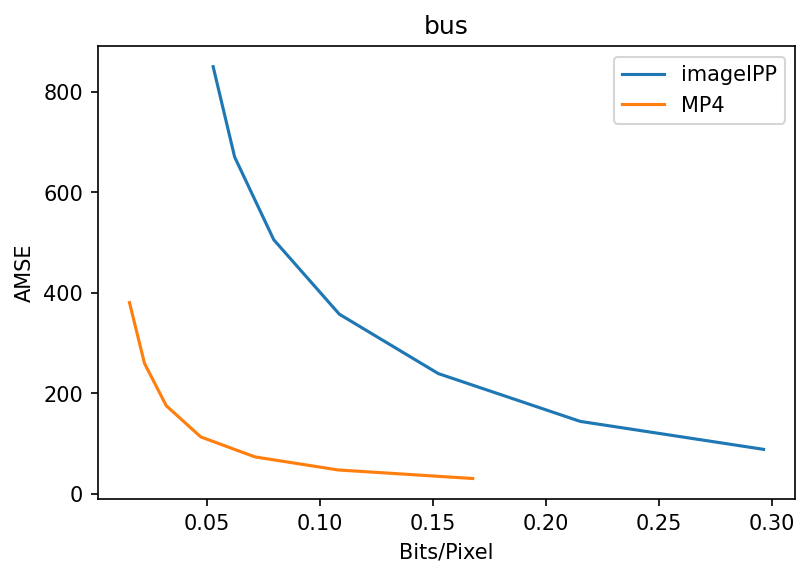

In [29]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import pylab

pylab.figure(dpi=150)
pylab.plot(*zip(*RD_image_IPP), label="image_IPP")
pylab.plot(*zip(*RD_MP4), label="MP4")
pylab.title(f"{sequence}")
pylab.xlabel("Bits/Pixel")
pylab.ylabel("AMSE")
plt.legend(loc='upper right')
pylab.show()

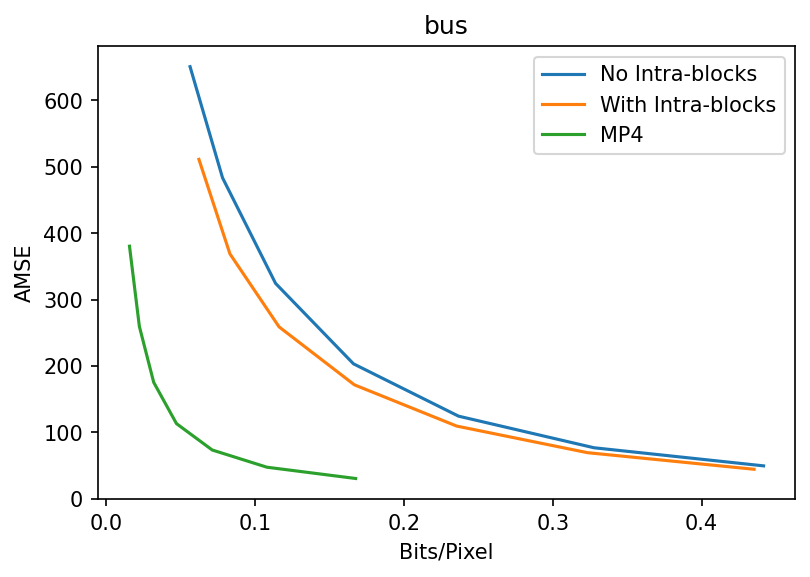

In [23]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import pylab

pylab.figure(dpi=150)
pylab.plot(*zip(*RD_points_no_intrablocks), label="No Intra-blocks")
pylab.plot(*zip(*RD_points_with_intrablocks), label="With Intra-blocks")
pylab.plot(*zip(*RD_points_MP4), label="MP4")
pylab.title(f"{sequence}")
pylab.xlabel("Bits/Pixel")
pylab.ylabel("AMSE")
plt.legend(loc='upper right')
pylab.show()